In [16]:
import pandas as pd
import re
import numpy as np

In [17]:
def clean_value(x):
    if pd.isna(x):
        return None
    x = str(x)

    if ";" in x:
        x = x.split(";")[0]

    x = x.replace(",", ".")

 
    x = x.strip()

    try:
        return float(x)
    except:
        return None


In [18]:
def clean_value(x):
    """'30,87' / '235' / '69;23' gibi değerleri float'a çevirir."""
    if pd.isna(x):
        return None
    x = str(x)
   
    if ";" in x:
        x = x.split(";")[0]
  
    x = x.replace(",", ".").strip()
    try:
        return float(x)
    except:
        return None


In [19]:
def clean_annual_temperature(path, country_name):
    import pandas as pd

    df = pd.read_excel(path, header=None)

   
    df = df[df[0].astype(str).str.isnumeric()]

   
    df.columns = ["Year", "temp_raw"]

    
    df["temp_raw"] = df["temp_raw"].astype(str).str.replace(",", ".")

 
    df["avg_temp"] = df["temp_raw"].astype(float)

    df["date"] = pd.to_datetime(df["Year"].astype(int), format="%Y")

    df["country"] = country_name

    return df[["date", "country", "avg_temp"]]


In [20]:
coffee_raw = pd.read_excel(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\FAOSTAT_coffee.xlsx")


target_countries = ["Brazil", "Colombia", "Indonesia"]

coffee = coffee_raw[
    (coffee_raw["Item"] == "Coffee, green") &
    (coffee_raw["Element"] == "Production") &
    (coffee_raw["Area"].isin(target_countries))
]


coffee["date"] = pd.to_datetime(coffee["Year"].astype(int), format="%Y")


coffee.rename(columns={"Area": "country", "Value": "production_tons"}, inplace=True)


coffee_yearly = coffee[["date", "country", "production_tons"]]


coffee_monthly = (
    coffee_yearly
    .set_index("date")
    .groupby("country")["production_tons"]
    .resample("ME")
    .ffill()
    .reset_index()
)

print(coffee_monthly.head())


  country       date  production_tons
0  Brazil 1961-01-31        2228704.0
1  Brazil 1961-02-28        2228704.0
2  Brazil 1961-03-31        2228704.0
3  Brazil 1961-04-30        2228704.0
4  Brazil 1961-05-31        2228704.0


In [21]:
stores = pd.read_csv(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\directory.csv")


target_codes = {"BR": "Brazil", "CO": "Colombia", "ID": "Indonesia"}


stores_filtered = stores[stores["Country"].isin(target_codes.keys())].copy()


stores_filtered["country"] = stores_filtered["Country"].map(target_codes)


store_counts = stores_filtered.groupby("country").size().reset_index(name="store_count")

print(store_counts)


     country  store_count
0     Brazil          102
1   Colombia           11
2  Indonesia          268


In [22]:

store_counts = pd.DataFrame({
    "country": ["Brazil", "Colombia", "Indonesia"],
    "store_count": [102, 11, 268]
})


date_range = pd.date_range("2010-01-01", "2023-12-01", freq="MS")

df_list = []
for _, row in store_counts.iterrows():
    df = pd.DataFrame({
        "date": date_range,
        "country": row["country"],
        "store_count": row["store_count"]
    })
    df_list.append(df)

stores_monthly = pd.concat(df_list, ignore_index=True)

stores_monthly


,date,country,store_count
0,2010-01-01,Brazil,102
1,2010-02-01,Brazil,102
2,2010-03-01,Brazil,102
3,2010-04-01,Brazil,102
4,2010-05-01,Brazil,102
...,...,...,...
499,2023-08-01,Indonesia,268
500,2023-09-01,Indonesia,268
501,2023-10-01,Indonesia,268
502,2023-11-01,Indonesia,268


In [23]:
df = pd.read_excel(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_indonesia.xlsx")

df = df.rename(columns={
    "observation_date": "date",
    "PCOFFROBUSDM": "coffee_price"
})


df["date"] = pd.to_datetime(df["date"])

df = df[df["date"].dt.year >= 2000]

df["country"] = "Indonesia"


indonesia_price = df[["date", "country", "coffee_price"]]

print(indonesia_price.head())
print(indonesia_price.tail())

          date    country  coffee_price
120 2000-01-01  Indonesia     54.068571
121 2000-02-01  Indonesia     48.987143
122 2000-03-01  Indonesia     46.255217
123 2000-04-01  Indonesia     44.561000
124 2000-05-01  Indonesia     43.742174
          date    country  coffee_price
421 2025-02-01  Indonesia    263.045000
422 2025-03-01  Indonesia    257.684286
423 2025-04-01  Indonesia    246.549091
424 2025-05-01  Indonesia    237.303182
425 2025-06-01  Indonesia    196.213810


In [24]:
col_raw = pd.read_excel(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_colombia.xlsx")

col_raw = col_raw.rename(columns={
    "Año": "year",
    "Precio externo": "coffee_price"
})


col_raw = col_raw[col_raw["year"] >= 2000]

col_raw["date"] = pd.to_datetime(col_raw["year"].astype(int), format="%Y")


col_raw["country"] = "Colombia"


col_price_monthly = (
    col_raw[["date", "country", "coffee_price"]]
    .set_index("date")
    .groupby("country")["coffee_price"]
    .resample("ME")
    .ffill()
    .reset_index()
)

print(col_price_monthly.head())


    country       date  coffee_price
0  Colombia 2000-01-31    102.290833
1  Colombia 2000-02-29    102.290833
2  Colombia 2000-03-31    102.290833
3  Colombia 2000-04-30    102.290833
4  Colombia 2000-05-31    102.290833


In [25]:
bra_raw = pd.read_excel(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_brazil.xlsx", header=3)

bra_raw = bra_raw.rename(columns={
    "Date": "date",
    "Price US$": "coffee_price"
})

bra_raw["date"] = pd.to_datetime(bra_raw["date"], dayfirst=False, errors="coerce")

bra_raw = bra_raw.dropna(subset=["date"])

bra_raw = bra_raw[bra_raw["date"].dt.year >= 2000]

bra_raw["country"] = "Brazil"

bra_price_monthly = (
    bra_raw
    .set_index("date")
    .groupby("country")["coffee_price"]
    .resample("ME")
    .mean()
    .reset_index()
)

print(bra_price_monthly.head())


  country       date  coffee_price
0  Brazil 2000-01-31    123.809524
1  Brazil 2000-02-29    111.148571
2  Brazil 2000-03-31    111.482381
3  Brazil 2000-04-30    101.897895
4  Brazil 2000-05-31     98.093182


In [26]:
prices_all = pd.concat(
    [bra_price_monthly, col_price_monthly, indonesia_price],
    ignore_index=True
)

print(prices_all.head())
print(prices_all["country"].value_counts())

  country       date  coffee_price
0  Brazil 2000-01-31    123.809524
1  Brazil 2000-02-29    111.148571
2  Brazil 2000-03-31    111.482381
3  Brazil 2000-04-30    101.897895
4  Brazil 2000-05-31     98.093182
country
Brazil       311
Indonesia    306
Colombia     289
Name: count, dtype: int64


In [29]:
def expand_annual_to_monthly(path, country_name):
 
    df = pd.read_excel(path, header=None)

 
    df = df[df[0].astype(str).str.isnumeric()]
    df.columns = ["Year", "temp_raw"]

    df["temp_raw"] = df["temp_raw"].astype(str).str.replace(",", ".")
    df["avg_temp"] = df["temp_raw"].astype(float)

 
    df = df[(df["Year"] >= 2010) & (df["Year"] <= 2023)]

    expanded = []
    for _, row in df.iterrows():
        year = int(row["Year"])
        avg_temp = row["avg_temp"]

        dates = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-01", freq="MS")

        for d in dates:
            expanded.append([d, country_name, avg_temp])

    expanded_df = pd.DataFrame(expanded, columns=["date", "country", "avg_temp"])
    return expanded_df


In [30]:
brazil_temp = expand_annual_to_monthly(
    r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\brazil_weather.xlsx","Brazil")
indonesia_temp = expand_annual_to_monthly(
    r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\indonesia_weather.xlsx","Indonesia")
colombia_temp = expand_annual_to_monthly(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\colombia_weather.xlsx","Colombia")

In [32]:
import pandas as pd

def load_faostat_single_file(path):
    df = pd.read_excel(path)

    df = df[df["Element"] == "Production Quantity"]

    df = df[["Area", "Year", "Value"]]

    df = df.rename(columns={
        "Area": "country",
        "Value": "production_tons"
    })

    df["date"] = pd.to_datetime(df["Year"].astype(int), format="%Y")

    df = df[["date", "country", "production_tons"]]

    return df


In [33]:
production = load_faostat_single_file(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\FAOSTAT_coffee.xlsx")

In [35]:
def expand_production_to_months(df):
    rows = []
    for _, row in df.iterrows():
        year = row["date"].year
        prod = row["production_tons"]
        country = row["country"]

        months = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-01", freq="MS")

        for d in months:
            rows.append([d, country, prod])

    return pd.DataFrame(rows, columns=["date", "country", "production_tons"])


In [36]:
production_monthly = expand_production_to_months(production)

In [37]:
production["date"] = pd.to_datetime(production["date"]).values.astype("datetime64[M]")
production_2010 = production[production["date"] >= "2010-01-01"]

In [38]:
prices_all["date"] = pd.to_datetime(prices_all["date"]).values.astype("datetime64[M]")
prices_2010 = prices_all[prices_all["date"] >= "2010-01-01"]


In [40]:

def load_faostat_single_file(path):
    df = pd.read_excel(path)

   
    df = df[df["Element"] == "Production Quantity"]

    df = df[["Area", "Year", "Value"]]
    df = df.rename(columns={
        "Area": "country",
        "Value": "production_tons"
    })

    df["date"] = pd.to_datetime(df["Year"].astype(int), format="%Y")

    return df[["date", "country", "production_tons"]]

production = load_faostat_single_file(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\FAOSTAT_coffee.xlsx")


In [41]:
production_monthly = expand_production_to_months(production)
production_monthly = production_monthly[production_monthly["date"] >= "2010-01-01"]
prices_all["date"] = pd.to_datetime(prices_all["date"]).values.astype("datetime64[M]")
prices_2010 = prices_all[prices_all["date"] >= "2010-01-01"]


In [42]:
faostat = pd.read_excel(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\FAOSTAT_coffee.xlsx")

faostat_clean = faostat[
    (faostat["Item"] == "Coffee, green") &
    (faostat["Element"] == "Production")
].copy()

faostat_clean = faostat_clean.rename(columns={
    "Area": "country",
    "Year": "Year",
    "Value": "production_tons"
})

faostat_clean = faostat_clean[["country", "Year", "production_tons"]]

faostat_clean = faostat_clean[faostat_clean["Year"] >= 2010]

faostat_clean["date"] = pd.to_datetime(faostat_clean["Year"].astype(str) + "-01-01")

production_yearly = faostat_clean[["date", "country", "production_tons"]].reset_index(drop=True)

production_yearly.head()


,date,country,production_tons
0,2010-01-01,Brazil,2907265.0
1,2011-01-01,Brazil,2700540.0
2,2012-01-01,Brazil,3037534.0
3,2013-01-01,Brazil,2964538.0
4,2014-01-01,Brazil,2804070.0


In [43]:
def expand_annual_to_monthly(path, country_name):
    df = pd.read_excel(path, header=None)

    df = df[df[0].astype(str).str.isnumeric()]
    df.columns = ["Year", "temp_raw"]

    df["temp_raw"] = df["temp_raw"].astype(str).str.replace(",", ".")
    df["avg_temp"] = df["temp_raw"].astype(float)

    df = df[(df["Year"] >= 2010) & (df["Year"] <= 2023)]

    rows = []
    for _, row in df.iterrows():
        year = int(row["Year"])
        temp = row["avg_temp"]

        months = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-01", freq="MS")
        for d in months:
            rows.append([d, country_name, temp])

    return pd.DataFrame(rows, columns=["date", "country", "avg_temp"])
brazil_temp = expand_annual_to_monthly(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\brazil_weather.xlsx", "Brazil")
colombia_temp = expand_annual_to_monthly(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\colombia_weather.xlsx", "Colombia")
indonesia_temp = expand_annual_to_monthly(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\indonesia_weather.xlsx", "Indonesia")

climate_temp = pd.concat([brazil_temp, colombia_temp, indonesia_temp], ignore_index=True)


In [44]:
store_months = pd.date_range("2010-01-01", "2023-12-01", freq="MS")

stores_raw = pd.DataFrame({
    "country": ["Brazil", "Colombia", "Indonesia"],
    "store_count": [102, 11, 268]
})

rows = []
for _, row in stores_raw.iterrows():
    for d in store_months:
        rows.append([d, row["country"], row["store_count"]])

stores_2010 = pd.DataFrame(rows, columns=["date", "country", "store_count"])


In [46]:
panel = (
    production_monthly
    .merge(prices_2010, on=["date","country"], how="left")
    .merge(climate_temp, on=["date","country"], how="left")
    .merge(stores_2010, on=["date","country"], how="left")
)

panel = panel.sort_values(["country","date"]).reset_index(drop=True)


In [48]:

brazil_raw = pd.read_excel(
    r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_brazil.xlsx",
    header=None
)

brazil_raw = brazil_raw.iloc[2:].reset_index(drop=True)

brazil_raw.columns = ["date", "coffee_price"]

brazil_raw = brazil_raw[brazil_raw["date"] != "Date"]

brazil_raw = brazil_raw.dropna()

brazil_raw["date"] = pd.to_datetime(brazil_raw["date"], errors="coerce")

brazil_raw = brazil_raw.dropna(subset=["date"])

brazil_raw["coffee_price"] = (
    brazil_raw["coffee_price"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)

brazil_raw = brazil_raw[brazil_raw["coffee_price"].str.match(r"^\d+(\.\d+)?$")]

brazil_raw["coffee_price"] = brazil_raw["coffee_price"].astype(float)

brazil_raw["country"] = "Brazil"

brazil_raw["Year"] = brazil_raw["date"].dt.year

brazil_price = brazil_raw[brazil_raw["Year"] >= 2010]

brazil_price_yearly = (
    brazil_price.groupby(["Year", "country"])["coffee_price"]
    .mean()
    .reset_index()
)

brazil_price_yearly["date"] = pd.to_datetime(
    brazil_price_yearly["Year"].astype(str) + "-01-01"
)

brazil_price_yearly.head()


,Year,country,coffee_price,date
0,2010,Brazil,177.195341,2010-01-01
1,2011,Brazil,296.379520,2011-01-01
2,2012,Brazil,201.761245,2012-01-01
3,2013,Brazil,134.784661,2013-01-01
4,2014,Brazil,177.974502,2014-01-01


In [49]:
col_raw = pd.read_excel(
    r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_colombia.xlsx"
)

col_raw = col_raw.rename(columns={
    "Año": "Year",
    "Precio externo": "coffee_price"
})

col_raw["country"] = "Colombia"

col_raw = col_raw.dropna(subset=["Year", "coffee_price"])

col_raw["Year"] = col_raw["Year"].astype(int)

col_raw["coffee_price"] = (
    col_raw["coffee_price"].astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

col_price_yearly = col_raw[col_raw["Year"] >= 2010].copy()

col_price_yearly["date"] = pd.to_datetime(
    col_price_yearly["Year"].astype(str) + "-01-01"
)

col_price_yearly = col_price_yearly[["date", "Year", "country", "coffee_price"]]

col_price_yearly.head()


,date,Year,country,coffee_price
97,2010-01-01,2010,Colombia,224.593151
98,2011-01-01,2011,Colombia,284.308555
99,2012-01-01,2012,Colombia,203.187953
100,2013-01-01,2013,Colombia,148.426164
101,2014-01-01,2014,Colombia,197.072827


In [50]:
indo_raw = pd.read_excel(
    r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\coffee_prices_indonesia.xlsx"
)

indo_raw = indo_raw.rename(columns={
    "observation_date": "date",
    "PCOFFROBUSDM": "coffee_price"
})

indo_raw["country"] = "Indonesia"

indo_raw["date"] = pd.to_datetime(indo_raw["date"], errors="coerce")

indo_raw = indo_raw.dropna(subset=["date", "coffee_price"])

indo_raw["Year"] = indo_raw["date"].dt.year

indo_raw = indo_raw[indo_raw["Year"] >= 2010]

indo_raw["coffee_price"] = indo_raw["coffee_price"].astype(float)

indo_price_yearly = (
    indo_raw.groupby(["Year", "country"])["coffee_price"]
    .mean()
    .reset_index()
)

indo_price_yearly["date"] = pd.to_datetime(
    indo_price_yearly["Year"].astype(str) + "-01-01"
)

indo_price_yearly = indo_price_yearly[["date", "Year", "country", "coffee_price"]]

indo_price_yearly.head()


,date,Year,country,coffee_price
0,2010-01-01,2010,Indonesia,78.731030
1,2011-01-01,2011,Indonesia,109.238366
2,2012-01-01,2012,Indonesia,102.843509
3,2013-01-01,2013,Indonesia,94.117763
4,2014-01-01,2014,Indonesia,100.419395


In [64]:
prices_yearly = pd.concat(
    [brazil_price_yearly, col_price_yearly, indo_price_yearly],
    ignore_index=True
)

prices_yearly.head()


,Year,country,coffee_price,date
0,2010,Brazil,177.195341,2010-01-01
1,2011,Brazil,296.379520,2011-01-01
2,2012,Brazil,201.761245,2012-01-01
3,2013,Brazil,134.784661,2013-01-01
4,2014,Brazil,177.974502,2014-01-01


In [65]:

stores_raw = pd.DataFrame({
    "country": ["Brazil", "Colombia", "Indonesia"],
    "store_count": [102, 11, 268]
})

years = list(range(2010, 2024))

store_rows = []
for _, row in stores_raw.iterrows():
    for y in years:
        store_rows.append([
            pd.to_datetime(f"{y}-01-01"),
            y,
            row["country"],
            row["store_count"]
        ])

store_count_yearly = pd.DataFrame(
    store_rows,
    columns=["date", "Year", "country", "store_count"]
)

store_count_yearly.head(), store_count_yearly.tail()


(        date  Year country  store_count
 0 2010-01-01  2010  Brazil          102
 1 2011-01-01  2011  Brazil          102
 2 2012-01-01  2012  Brazil          102
 3 2013-01-01  2013  Brazil          102
 4 2014-01-01  2014  Brazil          102,
          date  Year    country  store_count
 37 2019-01-01  2019  Indonesia          268
 38 2020-01-01  2020  Indonesia          268
 39 2021-01-01  2021  Indonesia          268
 40 2022-01-01  2022  Indonesia          268
 41 2023-01-01  2023  Indonesia          268)

In [66]:
stores_raw = pd.DataFrame({
    "country": ["Brazil", "Colombia", "Indonesia"],
    "store_count": [102, 11, 268]
})

years = list(range(2010, 2024))

store_rows = []
for _, row in stores_raw.iterrows():
    for y in years:
        store_rows.append([
            pd.to_datetime(f"{y}-01-01"),
            y,
            row["country"],
            row["store_count"]
        ])

store_count_yearly = pd.DataFrame(
    store_rows,
    columns=["date", "Year", "country", "store_count"]
)

store_count_yearly.head(), store_count_yearly.tail()


(        date  Year country  store_count
 0 2010-01-01  2010  Brazil          102
 1 2011-01-01  2011  Brazil          102
 2 2012-01-01  2012  Brazil          102
 3 2013-01-01  2013  Brazil          102
 4 2014-01-01  2014  Brazil          102,
          date  Year    country  store_count
 37 2019-01-01  2019  Indonesia          268
 38 2020-01-01  2020  Indonesia          268
 39 2021-01-01  2021  Indonesia          268
 40 2022-01-01  2022  Indonesia          268
 41 2023-01-01  2023  Indonesia          268)

In [67]:
print("production_yearly:", production_yearly.columns)
print("prices_yearly:", prices_yearly.columns)
print("store_count_yearly:", store_count_yearly.columns)


production_yearly: Index(['date', 'country', 'production_tons', 'Year'], dtype='object')
prices_yearly: Index(['Year', 'country', 'coffee_price', 'date'], dtype='object')
store_count_yearly: Index(['date', 'Year', 'country', 'store_count'], dtype='object')


In [68]:
production_yearly["Year"] = production_yearly["date"].dt.year

In [69]:
panel_yearly = production_yearly.merge(
    prices_yearly,
    on=["Year", "country"],
    how="left"
).merge(
    store_count_yearly[["Year", "country", "store_count"]],
    on=["Year", "country"],
    how="left"
)

panel_yearly.head()


,date_x,country,production_tons,Year,coffee_price,date_y,store_count
0,2010-01-01,Brazil,2907265.0,2010,177.195341,2010-01-01,102
1,2011-01-01,Brazil,2700540.0,2011,296.379520,2011-01-01,102
2,2012-01-01,Brazil,3037534.0,2012,201.761245,2012-01-01,102
3,2013-01-01,Brazil,2964538.0,2013,134.784661,2013-01-01,102
4,2014-01-01,Brazil,2804070.0,2014,177.974502,2014-01-01,102


In [72]:
print(panel_yearly.columns)
print(panel_yearly.head())
print(panel_yearly.isna().sum())


Index(['date_x', 'country', 'production_tons', 'Year', 'coffee_price',
       'date_y', 'store_count'],
      dtype='object')
      date_x country  production_tons  Year  coffee_price     date_y  \
0 2010-01-01  Brazil        2907265.0  2010    177.195341 2010-01-01   
1 2011-01-01  Brazil        2700540.0  2011    296.379520 2011-01-01   
2 2012-01-01  Brazil        3037534.0  2012    201.761245 2012-01-01   
3 2013-01-01  Brazil        2964538.0  2013    134.784661 2013-01-01   
4 2014-01-01  Brazil        2804070.0  2014    177.974502 2014-01-01   

   store_count  
0          102  
1          102  
2          102  
3          102  
4          102  
date_x             0
country            0
production_tons    0
Year               0
coffee_price       0
date_y             0
store_count        0
dtype: int64


In [ ]:
def load_climate_file(path, country_name):
    df_raw = pd.read_excel(path, header=None)

    cat_row = df_raw.index[
        df_raw.astype(str).apply(lambda row: row.str.contains("Category", na=False)).any(axis=1)
    ][0]

    df = pd.read_excel(path, skiprows=cat_row+1)

    temp_col = [c for c in df.columns if "Mean Surface" in c][0]

    df["Month"] = df[df.columns[0]].astype(str).str[:3]
    df["Month_num"] = pd.to_datetime(df["Month"], format="%b").dt.month


    years = list(range(2010, 2024))
    df_all = []

    for y in years:
        tmp = df.copy()
        tmp["Year"] = y
        df_all.append(tmp)

    df_all = pd.concat(df_all, ignore_index=True)


    df_all["date"] = pd.to_datetime({
        "year": df_all["Year"],
        "month": df_all["Month_num"],
        "day": 1
    })

   
    df_all = df_all[["date", temp_col]]
    df_all.columns = ["date", "avg_temp"]
    df_all["country"] = country_name

    return df_all


In [91]:
def load_annual_climate(path, country_name):

    df = pd.read_excel(path, header=None)

 
    df = df.iloc[6:, :]  

    df = df.iloc[:, :2]
    df.columns = ["Year", "avg_temp_raw"]

    df["avg_temp"] = (
        df["avg_temp_raw"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

    df["Year"] = df["Year"].astype(int)

    df["date"] = pd.to_datetime(df["Year"].astype(str) + "-01-01")

    df["country"] = country_name

    df = df[["Year", "date", "country", "avg_temp"]]

    return df


In [92]:
brazil_climate = load_annual_climate(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\brazil_weather.xlsx", "Brazil")
colombia_climate = load_annual_climate(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\colombia_weather.xlsx", "Colombia")
indonesia_climate = load_annual_climate(r"C:\Users\hp\OneDrive\Belgeler\DSA210_Project\data\indonesia_weather.xlsx", "Indonesia")

climate_all = pd.concat([brazil_climate, colombia_climate, indonesia_climate], ignore_index=True)


In [95]:
climate_yearly = climate_all.copy()
climate_yearly = climate_yearly[["Year", "country", "avg_temp"]]
panel_yearly = (
    production_yearly
    .merge(prices_yearly, on=["Year", "country"], how="left")
    .merge(climate_yearly, on=["Year", "country"], how="left")
    .merge(stores_yearly, on=["Year", "country"], how="left")
)


NameError: name 'stores_yearly' is not defined

In [97]:
print(panel_yearly.isna().sum())
print(panel_yearly.head())
print(panel_yearly.tail())
panel_yearly = panel_yearly[panel_yearly["Year"] >= 2010].reset_index(drop=True)


date_x             0
country            0
production_tons    0
Year               0
coffee_price       0
date_y             0
store_count        0
dtype: int64
      date_x country  production_tons  Year  coffee_price     date_y  \
0 2010-01-01  Brazil        2907265.0  2010    177.195341 2010-01-01   
1 2011-01-01  Brazil        2700540.0  2011    296.379520 2011-01-01   
2 2012-01-01  Brazil        3037534.0  2012    201.761245 2012-01-01   
3 2013-01-01  Brazil        2964538.0  2013    134.784661 2013-01-01   
4 2014-01-01  Brazil        2804070.0  2014    177.974502 2014-01-01   

   store_count  
0          102  
1          102  
2          102  
3          102  
4          102  
       date_x    country  production_tons  Year  coffee_price     date_y  \
37 2019-01-01  Indonesia        752512.00  2019     73.565376 2019-01-01   
38 2020-01-01  Indonesia        762380.00  2020     68.755699 2020-01-01   
39 2021-01-01  Indonesia        786191.00  2021     89.824322 2021-01-01   
4

In [99]:
panel_yearly = (
    production_yearly
    .merge(prices_yearly, on=["Year", "country"], how="left")
    .merge(climate_yearly, on=["Year", "country"], how="left")
    .merge(stores_yearly, on=["Year", "country"], how="left")
)

print(panel_yearly.head(10))
print(panel_yearly.tail(10))
print(panel_yearly.isna().sum())


NameError: name 'stores_yearly' is not defined

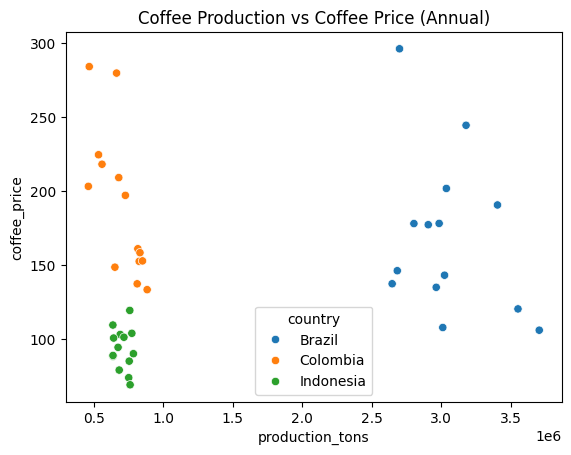

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
    data=panel_yearly, x="production_tons", y="coffee_price", hue="country"
)
plt.title("Coffee Production vs Coffee Price (Annual)")
plt.show()


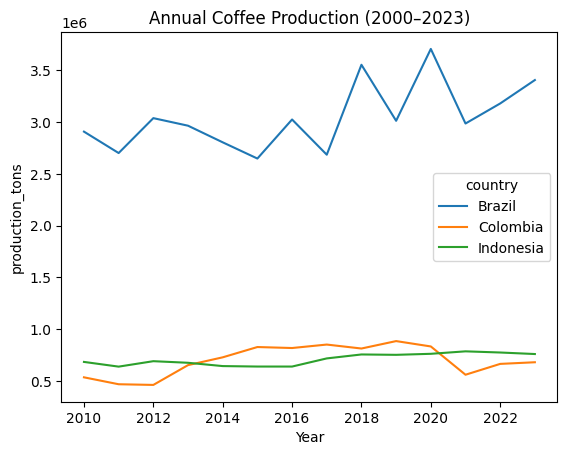

In [77]:
sns.lineplot(
    data=panel_yearly, x="Year", y="production_tons", hue="country"
)
plt.title("Annual Coffee Production (2000–2023)")
plt.show()


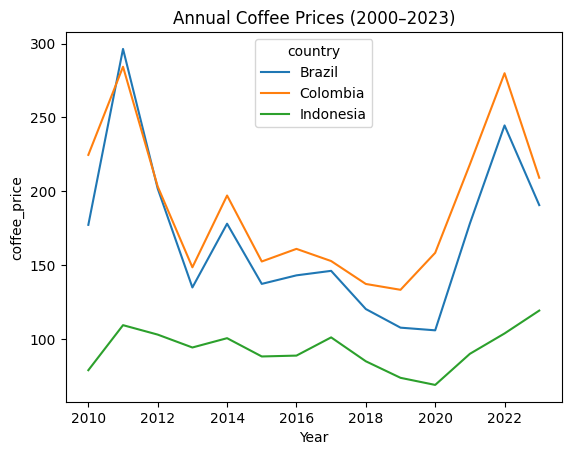

In [78]:
sns.lineplot(
    data=panel_yearly, x="Year", y="coffee_price", hue="country"
)
plt.title("Annual Coffee Prices (2000–2023)")
plt.show()


In [80]:
for c in panel_yearly['country'].unique():
    print("\nCountry:", c)
    print(
        panel_yearly[panel_yearly['country']==c][
            ["production_tons","coffee_price","avg_temp","rainfall","store_count"]
        ].corr()
    )



Country: Brazil


KeyError: "['avg_temp', 'rainfall'] not in index"

In [ ]:
import statsmodels.formula.api as smf

model1 = smf.ols("coffee_price ~ production_tons", data=panel_yearly).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           coffee_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.060
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.309
Time:                        00:26:17   Log-Likelihood:                -230.04
No. Observations:                  42   AIC:                             464.1
Df Residuals:                      40   BIC:                             467.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         138.0756     15.182     

In [ ]:
model2 = smf.ols(
    "coffee_price ~ production_tons + avg_temp + rainfall",
    data=panel_yearly
).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:           coffee_price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     18.05
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.91e-07
Time:                        00:27:56   Log-Likelihood:                -211.99
No. Observations:                  42   AIC:                             432.0
Df Residuals:                      38   BIC:                             438.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2132.6968    494.203     

In [ ]:
model3 = smf.ols(
    "coffee_price ~ production_tons + avg_temp + rainfall + C(country)",
    data=panel_yearly
).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:           coffee_price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     18.05
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.91e-07
Time:                        00:28:11   Log-Likelihood:                -211.99
No. Observations:                  42   AIC:                             432.0
Df Residuals:                      38   BIC:                             438.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

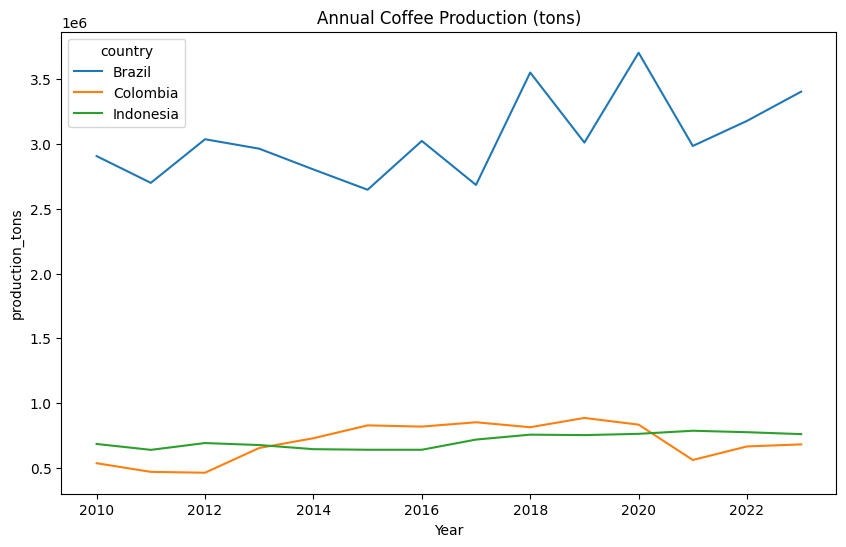

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=panel_yearly, x="Year", y="production_tons", hue="country")
plt.title("Annual Coffee Production (tons)")
plt.show()


In [ ]:
import statsmodels.formula.api as smf

model_prod_price = smf.ols("coffee_price ~ production_tons", data=panel_yearly).fit()
print(model_prod_price.summary())


                            OLS Regression Results                            
Dep. Variable:           coffee_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.060
Date:                Mon, 01 Dec 2025   Prob (F-statistic):              0.309
Time:                        00:35:37   Log-Likelihood:                -230.04
No. Observations:                  42   AIC:                             464.1
Df Residuals:                      40   BIC:                             467.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         138.0756     15.182     

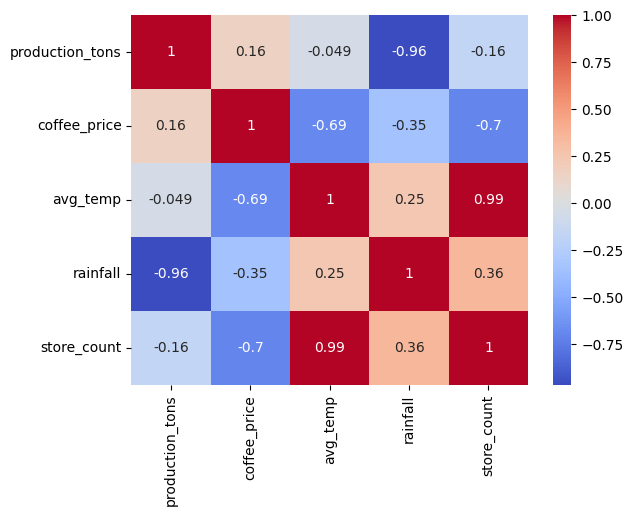

In [ ]:
corr = panel_yearly[["production_tons", "coffee_price", "avg_temp", "rainfall", "store_count"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(
    data=panel_yearly,
    x="avg_temp",
    y="production_tons",
    hue="country",
    aspect=1.5,
    height=6,
    scatter_kws={'alpha':0.6}
)
plt.title("Relation Between Temperature and Coffee Production")
plt.show()


KeyError: "['avg_temp'] not in index"

<Figure size 1000x600 with 0 Axes>

In [ ]:
for c in panel_yearly["country"].unique():
    print("\nCountry:", c)
    df_c = panel_yearly[panel_yearly["country"] == c]
    print(df_c[["production_tons", "avg_temp"]].corr())



Country: Brazil
                 production_tons  avg_temp
production_tons              1.0       NaN
avg_temp                     NaN       NaN

Country: Colombia
                 production_tons  avg_temp
production_tons              1.0       NaN
avg_temp                     NaN       NaN

Country: Indonesia
                 production_tons  avg_temp
production_tons              1.0       NaN
avg_temp                     NaN       NaN


In [ ]:
import statsmodels.formula.api as smf

for c in panel_yearly["country"].unique():
    print("\n###", c, "###")
    df_c = panel_yearly[panel_yearly["country"] == c]
    model = smf.ols("production_tons ~ avg_temp", data=df_c).fit()
    print(model.summary())



### Brazil ###
                            OLS Regression Results                            
Dep. Variable:        production_tons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                nan
Time:                        00:38:21   Log-Likelihood:                -196.84
No. Observations:                  14   AIC:                             395.7
Df Residuals:                      13   BIC:                             396.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4686.3365    131.985    

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
